### Import Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Upload

In [135]:
df = pd.read_csv('train.csv')
df.drop(columns = 'id', inplace = True)
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


### Clean Response Variable

In [136]:
df['cancel'].value_counts()

 0    741064
 2    228777
 1     75282
-1      3452
Name: cancel, dtype: int64

In [137]:
df = df[df['cancel'] != -1]
df['cancel'].value_counts()

0    741064
2    228777
1     75282
Name: cancel, dtype: int64

### Check Null values in Explanatory Variables

In [138]:
df.isnull().sum().sum()

14466

In [139]:
df.isnull().sum()

cancel                  0
year                    0
zip.code              944
house.color           939
ni.age               1001
len.at.res            960
credit                905
coverage.type         979
dwelling.type         990
premium               955
sales.channel        1020
ni.gender             957
ni.marital.status     992
n.adults              929
n.children            935
tenure                978
claim.ind             982
dtype: int64

*We will handle them as and when required.*

## Primary Set of Features

In [140]:
primary_x = ['claim.ind', 'sales.channel','dwelling.type','coverage.type','credit', 'tenure', 'premium']

# Drop null records for a primary set of features
df.dropna(axis = 0, subset = primary_x, inplace = True)

# Further cleaning of some columns:
df['claim.ind'] = df['claim.ind'].astype('int')
df['claim'] = df['claim.ind'].apply(lambda x: 'Y' if x == 1 else 'N')

df['sales.channel'] = df['sales.channel'].astype('category')
df['dwelling.type'] = df['dwelling.type'].astype('category')
df['coverage.type'] = df['coverage.type'].astype('category')
df['credit'] = df['credit'].astype('category')

df['tenure'] = df['tenure'].astype('int')

In [141]:
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,claim
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15,0,N
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15,0,N
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14,0,N
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22,1,Y
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4,0,N


Note: # Children, # Adults, Marital status, and Zip code appear as floating point numbers. They can be cleaned to appear as int or string: only after we remove null values from them. Will do that later.

### Checking Credit importance

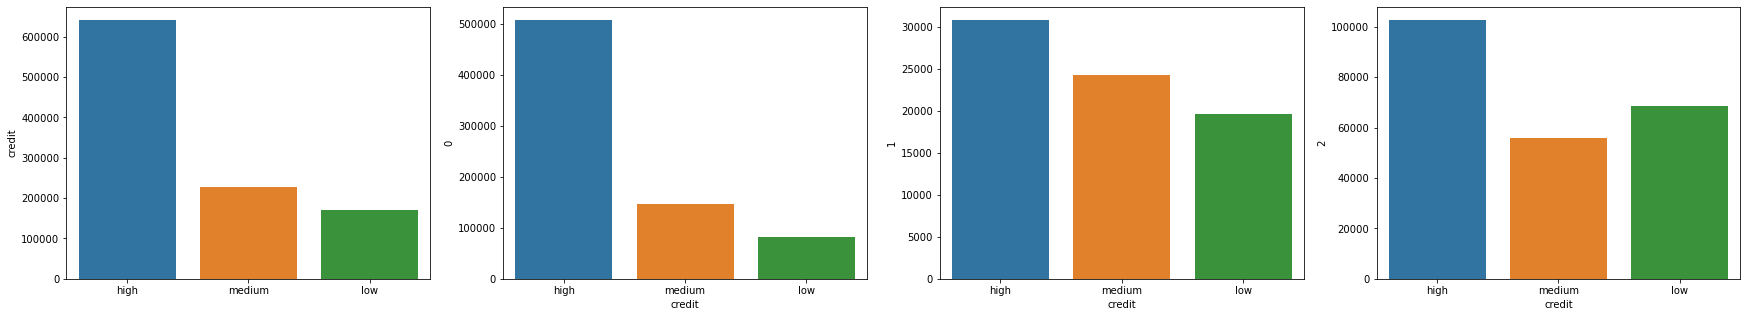

In [142]:
dt = pd.DataFrame(df['credit'].value_counts())
dt2 = pd.crosstab(df['credit'],df['cancel'])
order = ['high','medium','low']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, data = dt2, order = order, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, data = dt2, order = order, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, data = dt2, order = order,ax = ax[3])
plt.show()

OMG! There is clear effect of credit level on policy cancellations!!

### Checking Claim Importance

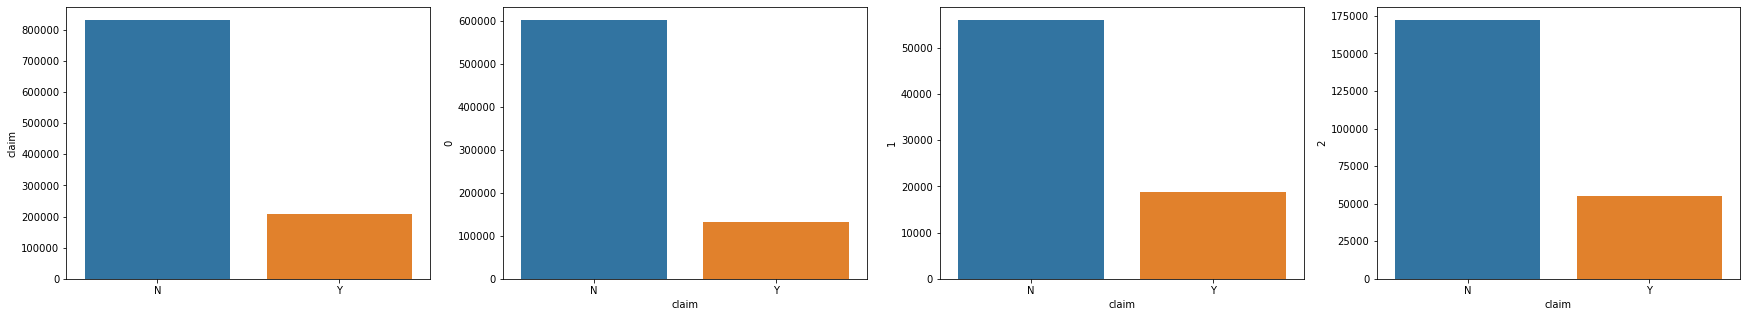

In [143]:
dt = pd.DataFrame(df['claim'].value_counts())
dt2 = pd.crosstab(df['claim'],df['cancel'])
order = ['N', 'Y']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'claim', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

The proportion of claims is slightly less for retained policies.

Still, Run Chi-Sq test of proportionality

### Checking Coverage Type Importance

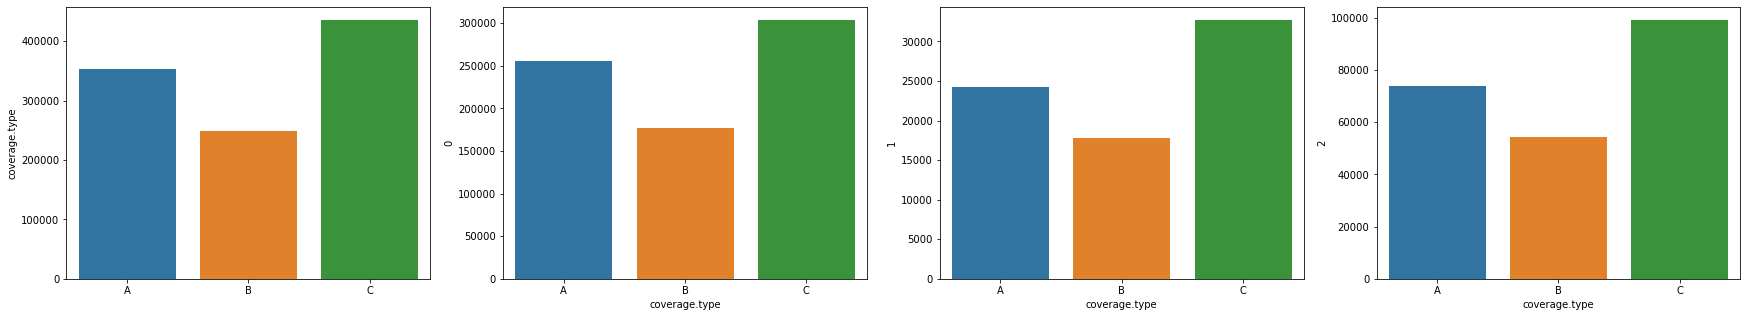

In [144]:
dt = pd.DataFrame(df['coverage.type'].value_counts())
dt2 = pd.crosstab(df['coverage.type'],df['cancel'])
order = ['A', 'B', 'C']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'coverage.type', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

Doesn't look like Coverage type is very different between cancelled & retained.

Still, we may want to run Chi-Sq tests

### Checking Sales Channel Importance

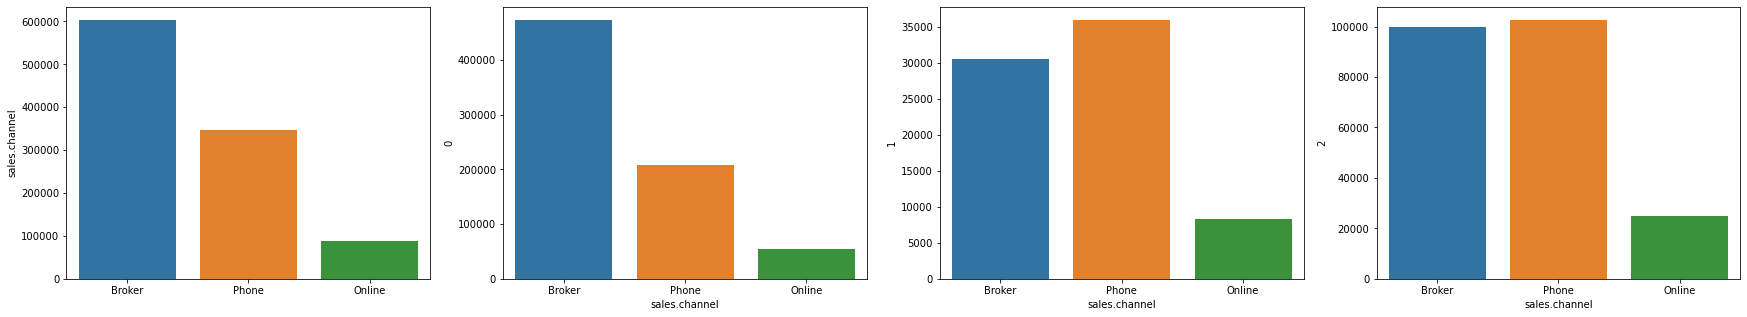

In [145]:
dt = pd.DataFrame(df['sales.channel'].value_counts())
dt2 = pd.crosstab(df['sales.channel'],df['cancel'])
order = ['Broker', 'Phone', 'Online']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'sales.channel', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

OMG!! There is clear effect of Sales Channel on Policies getting cancelled or retained!

Still, run chi-sq test of independence if want.

### Checking Dwelling Type Importance

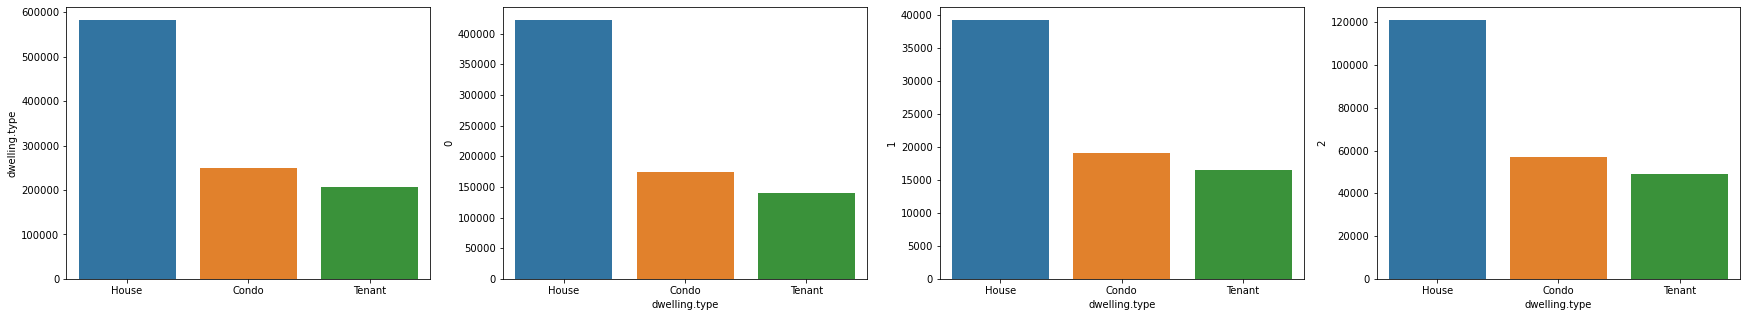

In [146]:
dt = pd.DataFrame(df['dwelling.type'].value_counts())
dt2 = pd.crosstab(df['dwelling.type'],df['cancel'])
order = ['House', 'Condo', 'Tenant']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'dwelling.type', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

Slightly higher cases of policy cancellation for Condo & Tenant. Still, doesn't say much.

Best to run Chi-Sq tests.

### Checking Premium Distribution across Cancellation Indicator

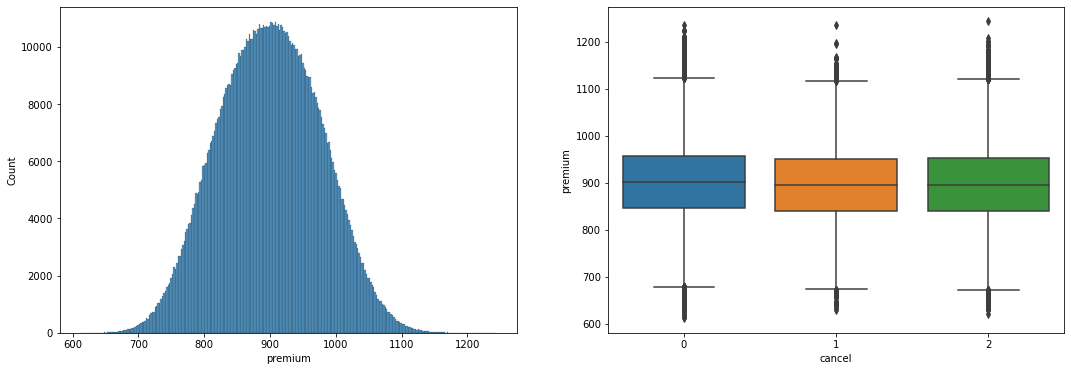

In [157]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'premium', data = df, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'premium', data = df, ax = ax[1])
plt.show()

Doesn't appear any difference in premium means across cancellation indicator. Doesn't look like an important variable.

### Checking Tenure Distribution across Cancellation Indicator

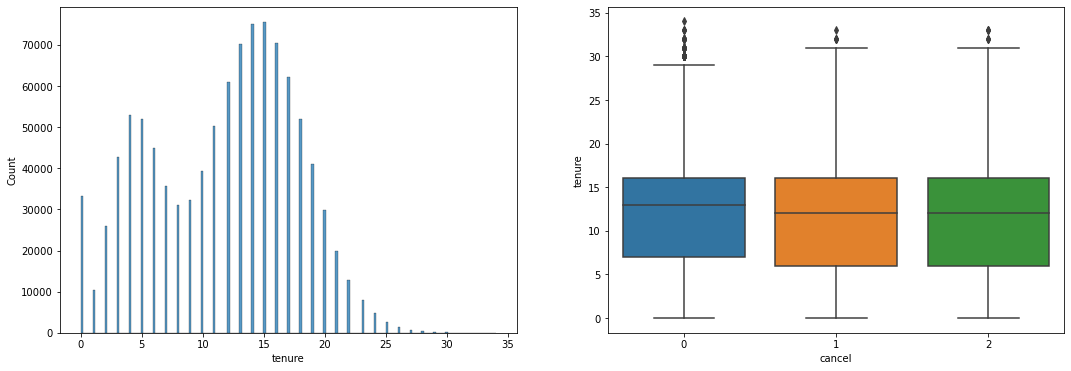

In [158]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'tenure', data = df, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'tenure', data = df, ax = ax[1])
plt.show()

Tenure is Bimodal.....need to look into this. Mean Tenure of retained customers appears slightly higher than others. Will need to perform ANOVA.

## Secondary Set of Features: Numerical

In [147]:
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,claim
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15,0,N
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15,0,N
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14,0,N
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22,1,Y
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4,0,N


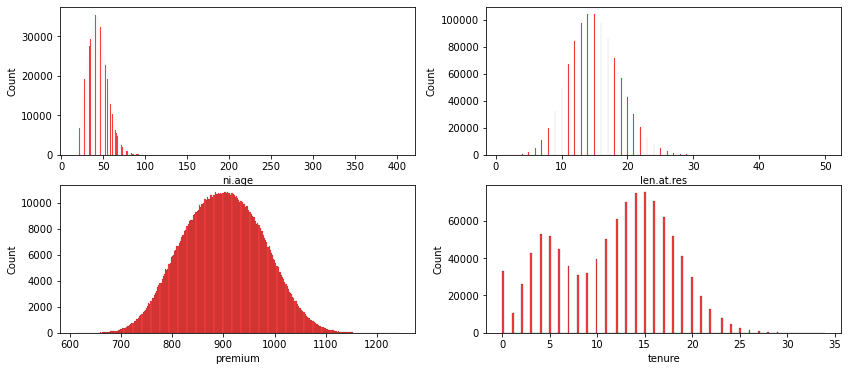

In [148]:
cols2 = ['ni.age','len.at.res','premium','tenure']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,6))
for i, p in enumerate(cols2):
    sns.histplot(x = p, data = df, color = 'red', ax = ax[i//2, i%2])
plt.show()